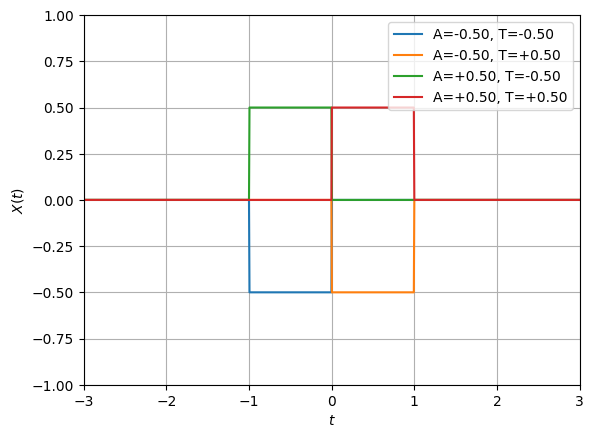

In [9]:
# plot rect function

from matplotlib.pylab import f
import numpy as np
import matplotlib.pyplot as plt

N = 1000
Nt = 1000
t = np.linspace(-3, 3, Nt)

for A in [-1/2, 1/2]:
    for T in [-1/2,1/2]:
      plt.plot(t, A * (abs(t - T) < 0.5), label=f'A={A:+.2f}, T={T:+.2f}')

plt.legend()
plt.ylim(-1, 1)
plt.xlim(-3, 3)
plt.xlabel('$t$')
plt.ylabel('$X(t)$')
plt.grid()
plt.show()


(-1.0, 1.0)

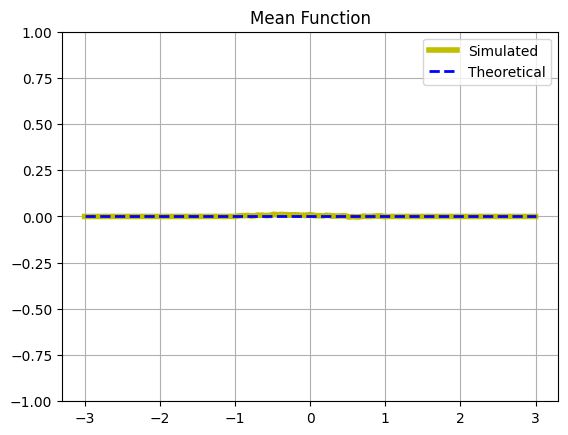

In [10]:
X = np.zeros((N, Nt))
for i in range(N):
    A = np.random.uniform(-1/2,1/2)
    T = np.random.uniform(-1/2,1/2)

    X[i, :] = A * (abs(t - T) < 0.5)


muX_sim = np.mean(X, axis=0)
muX_teo = np.zeros(N)

plt.figure()
plt.grid(True)
plt.plot(t, muX_sim, 'y', linewidth=4, label='Simulated')
plt.plot(t, muX_teo, 'b--', linewidth=2, label='Theoretical')
plt.title('Mean Function')
plt.legend()
plt.ylim(-1, 1)

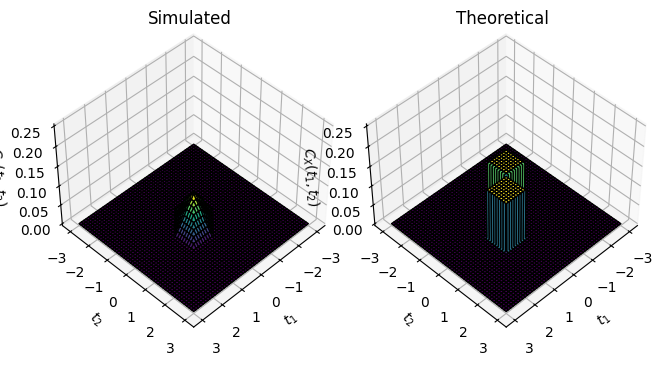

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have 't' and 'X' defined
t1 = t
t2 = t

T1, T2 = np.meshgrid(t1, t2)

CX_sim = np.cov(X, rowvar=False)
CX_teo = 1/4 * (1/2 * (np.abs(T1 + 1/2) < 0.5) * (np.abs(T2 + 1/2) < 0.5) +
               1/2 * (np.abs(T1 - 1/2) < 0.5) * (np.abs(T2 - 1/2) < 0.5))

fig = plt.figure()

# Simulated
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(T1, T2, CX_sim, cmap='viridis', edgecolor='k')
ax1.set_xlabel('$t_1$')
ax1.set_ylabel('$t_2$')
ax1.set_zlabel('$C_X(t_1,t_2)$')
ax1.grid(True)
ax1.set_title('Simulated')
ax1.view_init(45, 45)
ax1.set_zlim([0, 0.25])

# Theoretical
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(T1, T2, CX_teo, cmap='viridis', edgecolor='k')
ax2.set_xlabel('$t_1$')
ax2.set_ylabel('$t_2$')
ax2.set_zlabel('$C_X(t_1,t_2)$')
ax2.grid(True)
ax2.set_title('Theoretical')
ax2.view_init(45, 45)
ax2.set_zlim([0, 0.25])

plt.tight_layout()
plt.show()